<a href="https://colab.research.google.com/github/szh141/Examples/blob/main/One_Hot_encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


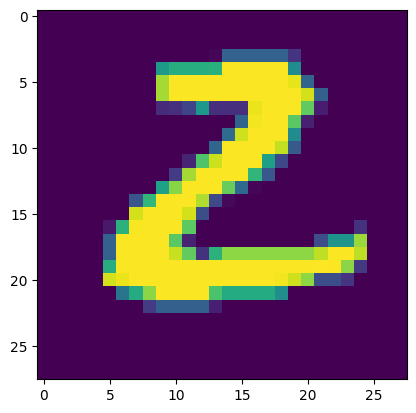

2
()


In [4]:
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

index = 187

plt.imshow(X_train[index])
plt.show()

print(y_train[index])
print(y_train[index].shape)

We can see that the actual y value for index 128 is 1 — meaning that it represents the number 1. The shape is () and hence we are really talking about a scalar value.

If we wanted to create a Neural Network, the best choice for this dataset would be to apply sparce categorical crossentropy loss— for the simple reason that we don’t have to apply one-hot encoding if we use that loss function.

Because we do want to illustrate how one-hot encoding works with TensorFlow and Keras, we use categorical crossentropy loss instead, so we must apply one-hot encoding to the samples.



Applying One-Hot Encoding to the samples

If we need to convert our dataset into categorical format (and hence one-hot encoded format), we can do so using Scikit-learn’s OneHotEncodermodule. However, TensorFlow also offers its own implementation: tensorflow.keras.utils.to_categorical. It's a utility function which allows us to convert integer targets into categorical and hence one-hot encoded ones.

In [5]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[index])
print(y_train[index].shape)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
(10,)


We can clearly see that our target vector has ten values (by means of the (10,) shape), one for each individual digit. The third is one while the others are zero, indicating that we are talking about the number 2, but then in one-hot encoded format. Exactly the same as our original integer value!

In [1]:
# Imports
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Convert targets into one-hot encoded format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

11490434/11490434 [==============================] - 0s 0us/step


change runtime to T4

In [2]:
# Imports
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, normalize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
import numpy as np

# Load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Configuration options
no_classes = len(np.unique(y_train))
img_width, img_height = 28, 28
validation_split = 0.20
no_epochs = 25
verbosity = 1
batch_size = 250

# Reshape data
X_train = X_train.reshape(X_train.shape[0], img_width, img_height, 1)
X_test =  X_test.reshape(X_test.shape[0], img_width, img_height, 1)
input_shape = (img_width, img_height, 1)

# Convert targets into one-hot encoded format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Normalize the data
X_train = normalize(X_train)
X_test = normalize(X_test)

# Create the model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(no_classes, activation='softmax'))

# Compile the model
model.compile(loss=categorical_crossentropy,
              optimizer=Adam(),
              metrics=['accuracy'])

# Fit data to model
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=no_epochs,
          verbose=verbosity,
          validation_split=validation_split)

Epoch 1/25
192/192 [==============================] - 7s 17ms/step - loss: 0.2098 - accuracy: 0.9343 - val_loss: 0.0754 - val_accuracy: 0.9774
Epoch 2/25
192/192 [==============================] - 3s 16ms/step - loss: 0.0549 - accuracy: 0.9827 - val_loss: 0.0698 - val_accuracy: 0.9789
Epoch 3/25
192/192 [==============================] - 3s 15ms/step - loss: 0.0308 - accuracy: 0.9904 - val_loss: 0.0674 - val_accuracy: 0.9809
Epoch 4/25
192/192 [==============================] - 4s 19ms/step - loss: 0.0169 - accuracy: 0.9944 - val_loss: 0.0646 - val_accuracy: 0.9814
Epoch 5/25
192/192 [==============================] - 3s 17ms/step - loss: 0.0096 - accuracy: 0.9972 - val_loss: 0.0771 - val_accuracy: 0.9817
Epoch 6/25
192/192 [==============================] - 4s 21ms/step - loss: 0.0068 - accuracy: 0.9978 - val_loss: 0.0779 - val_accuracy: 0.9815
Epoch 7/25
192/192 [==============================] - 3s 15ms/step - loss: 0.0056 - accuracy: 0.9984 - val_loss: 0.0760 - val_accuracy: 0.9804